# Analyze RAGIS ensmbles

In [1]:
from datetime import datetime
import numpy as np
import pylab as plt
import pandas as pd

from pismragis.observations import load_imbie, load_imbie_csv, load_mouginot

In [2]:
n_jobs = 8
norm_year = 1992

plt.rc('font', size=6)
plt.style.use("tableau-colorblind10")

mass_varname = "SLE (cm)"
mass_uncertainty_varname = "SLE uncertainty (cm)"
discharge_varname = "D (Gt/yr)"
discharge_uncertainty_varname = "D uncertainty (Gt/yr)"
smb_varname = "SMB (Gt/yr)"
smb_uncertainty_varname = "SMB uncertainty (Gt/yr)"


bg_color = "#216779"
bg_color = "w"
sim_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][1::]
imbie_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

sim_colors = [ "#d73027",  "#4575b4", "#fc8d59", "#91bfdb", "#fee090"]

imbie_color = "#756bb1"
mou_color = "#54278f"

imbie_color = "0.4"
mou_color = "0.2"

    
kg2cmsle = 1 / 1e12 * 1.0 / 362.5 / 10.0
gt2cmsle = 1 / 362.5 / 10.0
sigma = 2

## Load Observations

In [3]:
# imbie = load_imbie(url="../imbie_dataset_greenland_dynamics-2020_02_28.xlsx")
imbie = load_imbie()
# Glacier and Ice cap bias 30 Gt/yr, add it back
# imbie[mass_varname] -= 30 * gt2cmsle
#imbie[smb_varname] += 30

mou = load_mouginot(url="/Users/andy/Google Drive/My Drive/Projects/RAGIS/data/pnas.1904242116.sd02.xlsx")
mou_gis = mou[mou["Basin"] == "GIS"]

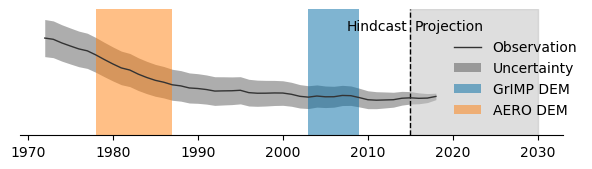

In [4]:
plt.rc('font', size=10)
plt.style.use("tableau-colorblind10")

ymin = -1
ymax = 2

fig = plt.figure(figsize=[6., 1.8])
ax = fig.add_subplot(111)

sigma = 4

ax.axvline(datetime(2015, 1, 1), color="k", linestyle="dashed", linewidth=1)
for obs, o, obs_color, obs_loc, obs_alpha  in zip([mou_gis], ["Mouginot (2019)"], 
                                       [mou_color], [(0.3, 0.0)], [0.4]):
    obs_line = ax.plot(obs["Date"], obs[mass_varname][::-1], color=obs_color, lw=1, label="Observation")
    obs_ci = ax.fill_between(obs["Date"], 
                    (obs[mass_varname][::-1] + sigma * obs[mass_uncertainty_varname][::-1]), 
                    (obs[mass_varname][::-1] - sigma * obs[mass_uncertainty_varname][::-1]), 
                    ls="solid", color=obs_color, lw=0, alpha=obs_alpha, label="Uncertainty")
l1 = ax.legend(loc="upper right", bbox_to_anchor=[1.05, 0.85])
l1.get_frame().set_linewidth(0.0)
l1.get_frame().set_alpha(0.0)
ax.fill_between([datetime(2015,1,1), datetime(2030,1,1)], [ymin, ymin], [ymax, ymax], color="0.75", alpha=0.5)
ax.text(datetime(2015, 7, 1), ymax-0.5, "Projection")
ax.text(datetime(2007, 7, 1), ymax-0.5, "Hindcast")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks([])
ax.set_ylim(ymin, ymax)
fig.tight_layout()
fig.savefig("historical-uncertainties-growth.pdf")
fig.savefig("historical-uncertainties-growth.png", dpi=300)
ax.fill_between([datetime(2003,1,1), datetime(2009,1,1)], [ymin, ymin], [ymax, ymax], alpha=0.5, label="GrIMP DEM")
l2 = ax.legend(loc="upper right", bbox_to_anchor=[1.05, 0.85])
l2.get_frame().set_linewidth(0.0)
l2.get_frame().set_alpha(0.0)
fig.savefig("historical-uncertainties-growth-grimp.pdf")
fig.savefig("historical-uncertainties-growth-grimp.png", dpi=300)
ax.fill_between([datetime(1978,1,1), datetime(1987,1,1)], [ymin, ymin], [ymax, ymax], alpha=0.5, label="AERO DEM")
l3 = ax.legend(loc="upper right", bbox_to_anchor=[1.05, 0.85])
l3.get_frame().set_linewidth(0.0)
l3.get_frame().set_alpha(0.0)
fig.savefig("historical-uncertainties-growth-dems.pdf")
fig.savefig("historical-uncertainties-growth-dems.png", dpi=300)